In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('mymoviedb.csv', lineterminator= '\n')

In [19]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [21]:
# 1. release date Dtyype (object to date and time) change
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [22]:
# check for duplicacy
df.duplicated().sum()


np.int64(0)

In [23]:
# statistical operaions
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# Exploration Summary 
- type(release_date) change to date time
- omit the white spaces in the genre column after each comma
- omit the unwanted columns like overview, original_language, poster_url
- there is noticable outliers in popularity column
- vote_average better be categorized for proper analysis

In [24]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtype)


datetime64[ns]


In [25]:
# we just want to keep years in release date column
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtype

dtype('int32')

In [26]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [27]:
cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis=1, inplace=True)
df.columns


Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [28]:
# we will put lables (classify) according to vote_average in 4 categories Popular, Average, Below_Avg, Not_Popular 
def categorize_vote(df, col, labels):
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df

In [29]:
labels = ['Not_Popular', 'Below_Avg', 'Average', 'Popular']

categorize_vote(df, 'Vote_Average', labels)

df['Vote_Average'].unique()


['Popular', 'Below_Avg', 'Average', 'Not_Popular', NaN]
Categories (4, object): ['Not_Popular' < 'Below_Avg' < 'Average' < 'Popular']

In [30]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_Avg,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


In [31]:
# analysing the number of movies in each category
df['Vote_Average'].value_counts()

Vote_Average
Not_Popular    2467
Popular        2450
Average        2412
Below_Avg      2398
Name: count, dtype: int64

In [32]:
df.dropna(inplace=True)

df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [33]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_Avg,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


In [34]:
## we'd split the genres into a list and then explode our dataframe to have only one genre per row for each moview
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode(['Genre']).reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [ ]:
# now we have to type caste the genre column to category
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtype


CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  object  
dtypes: category(1), float64(1), int32(1), int64(1), object(2)
memory usage: 923.6+ KB


This implies the data has increased...

In [36]:
df.nunique()


Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# Now we will go to Data Visualization...

In [43]:
sns.set_style('darkgrid')

**What is the most frequent genre of movies released on Netflix?**

In [44]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

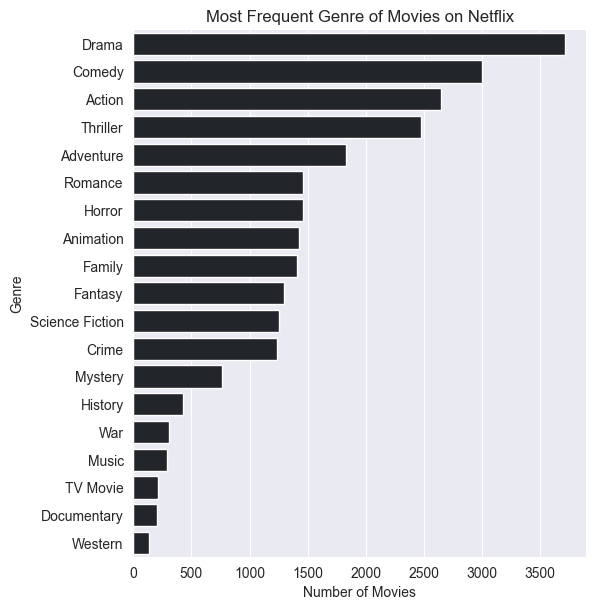

In [47]:
sns.catplot( y='Genre', data=df, kind='count', height=6, aspect=1, order=df['Genre'].value_counts().index, color='#21252b')
plt.title('Most Frequent Genre of Movies on Netflix')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

**Which has the highest votes in vote avg column?**

In [ ]:
df['Vote_Avg'].describe()

count    25552.000000
mean      1519.017650
std       2752.000974
min          1.000000
25%        172.000000
50%        498.000000
75%       1525.000000
max      31077.000000
Name: Vote_Count, dtype: float64

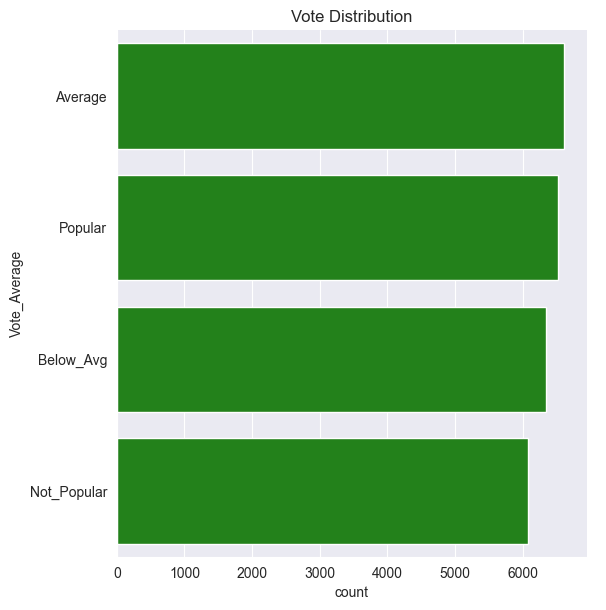

In [51]:
sns.catplot( y='Vote_Average', data=df, kind='count', height=6, aspect=1, order=df['Vote_Average'].value_counts().index, color='#14920a')
plt.title('Vote Distribution')
plt.show()

**What movie got the highest popularity? What's its genre?**

In [52]:
df['Popularity'].describe()

count    25552.000000
mean        41.973711
std        113.758561
min         13.354000
25%         16.363000
50%         21.844000
75%         36.462250
max       5083.954000
Name: Popularity, dtype: float64

In [56]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


**What movie got the lowest popularity? What's its genre?**

In [57]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25549,1984,Threads,13.354,186,Popular,War
25550,1984,Threads,13.354,186,Popular,Drama
25551,1984,Threads,13.354,186,Popular,Science Fiction


**Which year has the most filmed movies?**

In [58]:
df['Release_Date'].describe()

count    25552.000000
mean      2005.869795
std         15.486038
min       1902.000000
25%       2000.000000
50%       2010.000000
75%       2017.000000
max       2022.000000
Name: Release_Date, dtype: float64

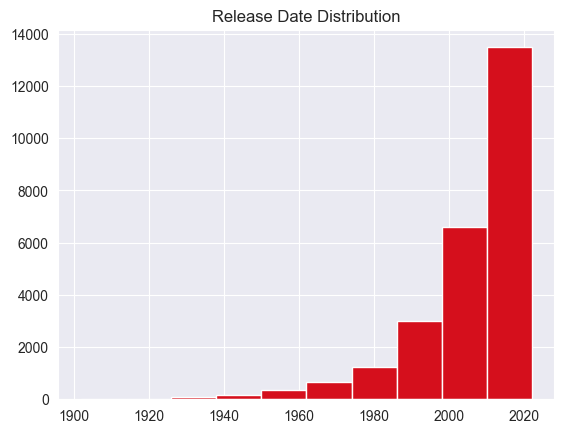

In [60]:
df['Release_Date'].hist(color='#d50f1c')
plt.title("Release Date Distribution")
plt.show()

In [62]:
maxMoviesProducingYear = df['Release_Date'].value_counts().idxmax()
maxMoviesProducingYear

np.int32(2021)

# Conclusion
1. What is the most frequent genre of movies released on Netflix?
- *Drama* is the most frequent genre of movies on Netflix. 
2. Which has the highest votes in vote avg column?
- *Drama* again gets the highest votes among all the genres.
3. What movie got the highest popularity? What's its genre?
- The movie *Spider-Man: No Way Home* has the highest popularity out of all the movies released on Netflix.
4. What movie got the lowest popularity? What's its genre?
- The movies *The United States* & *Thread* has the lowest rate in our dataset and the genres of the movies are music, drama, war, sci-fi and history. 
5. Which year has the most filmed movies?
- Year *2020* has the highest filming rate in our dataset.